# Data Mining Project - Spotify Recommendations
## Ericka Corral and Elizabeth Kelly

### Project description 

The project will explore how we can use classification techniques to predict if a person will like a song based on recorded attributes. Specifically, we will explore how to make models for binary classification, since liking a song or not can be described as a binary attribute.

We will build two prediction models: a decision tree and a support vector machine. Then we will test how accurate these models are or how susceptible they are to error/missclassification. We will start with simple versions of the model and then tweak them until they are optimal, then compare their performance.

Then we will use these models to classify other songs that are not classified to understand a person's preferences ( just for fun.)


### The Training and Testing Data

#### Source

https://www.kaggle.com/geomack/spotifyclassification

#### General Description
This data set is a table of songs that the creator of the data set likes and dislikes. There are 2016 records, with around half being catagorized as songs the person likes and the other half being described as songs the person dislikes. Most if not all the attribute categories are predicted values.


#### Attributes and their Meaning
 Following attributes and their descriptions from: https://developer.spotify.com/documentation/web-api/reference/#objects-index under 'AudioFeaturesObject'

- **Acousticness | float:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- **Danceability | float:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- **Duration_ms | integer:** The duration of the track in milliseconds.

- **Energy | float:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- **Instrumentalness | float:** Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- **Key | integer:** The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. There are typically 12 pitch classes, so there will be values 0-11 where (keys C=0, C#/Db=1, D=2, Eb/D#=3, E=4, F=5, F#/Gb=6, G=7, G#/Ab=8, A=9, Bb/A#=10, B/Cb=11)

- **liveness | float:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- **loudness | float:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

- **mode | integer:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- **spechiness | float:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- **tempo | tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- **Time Signature | integer:** An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

- **Valance | float:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Added attributes are:

- **target | integer:** Whether the person likes the song or not. 0 = do not like, 1 = like.

- **song_name | string:** Name of the song.

- **artist | string:** Who made the song.


#### Problems
When downloading the file as a csv from the website, some of the artist and song_title data is corrupted. Example: record 7 has " GyÃ¶ngyhajÃº lÃ¡ny " as the song title. Many of the attributes are also predicted, so some times they may be wrong. For example, in the time signature attribute, there are a few songs that have values of 5 (as in 5/4), which is an odd time signature and not really common in modern pop music. However, many songs seem to have 5/4 as the time signature. After looking at a few of those songs, they should actually be 4/4 or at least not in an odd time signature like that. It seems that if the song has enough synchopation, then it will be assigned 5/4. It would be useful to explore the data further to see how or why some attributes may be classified incorrectly. It may be measuring something else instead. Some of the attributes may also be a bit subjective or deal with emotion. Examples are valence, energy, or danceability. Many data attributes that should seem categorical use floating point numbers which is a little confusing. Tempo also uses floating point, which in my opinion is a bit weird. The attributes don't allow for more complex analysis for a song. Example: sometimes a song's tempo can be described as rubatto, meaning it feels improvised and doesn't really have a scrict tempo. What do you put as the tempo for a song such as that? 


In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import preprocessing as sk_preprocessing
import itertools


In [2]:
data = pd.read_csv(r'data_sets\spotify_dataset.csv', header = 0, names = ['index','acousticness', 'danceability','dur_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speachiness', 'tempo', 'time_sig', 'valence', 'target', 'song_title', 'artist'] )

In [3]:
data.describe()

index  acousticness  danceability        dur_ms       energy  \
count  2017.000000   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean   1008.000000      0.187590      0.618422  2.463062e+05     0.681577   
std     582.402066      0.259989      0.161029  8.198181e+04     0.210273   
min       0.000000      0.000003      0.122000  1.604200e+04     0.014800   
25%     504.000000      0.009630      0.514000  2.000150e+05     0.563000   
50%    1008.000000      0.063300      0.631000  2.292610e+05     0.715000   
75%    1512.000000      0.265000      0.738000  2.703330e+05     0.846000   
max    2016.000000      0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.000000     2.000000     0.092300    -8.394000     0.000000   
50%            0.000076     6.000000     0.127000    -6.248000     1.000000   
75%            0.054000     9.000000     0.247000    -4.746000     1.000000   
max            0.976000    11.000000     0.969000    -0.307000     1.000000   

       speachiness        tempo     time_sig      valence       target  
count  2017.000000  2017.000000  2017.000000  2017.000000  2017.000000  
mean      0.092664   121.603272     3.968270     0.496815     0.505702  
std       0.089931    26.685604     0.255853     0.247195     0.500091  
min       0.023100    47.859000     1.000000     0.034800     0.000000  
25%       0.037500   100.189000     4.000000     0.295000     0.000000  
50%       0.054900   121.427000     4.000000     0.492000     1.000000  
75%       0.108000   137.849000     4.000000     0.691000     1.000000  
max       0.816000   219.331000     5.000000     0.992000     1.000000

In [4]:
data.head(n = 10)

index  acousticness  danceability  dur_ms  energy  instrumentalness  key  \
0      0       0.01020         0.833  204600   0.434          0.021900    2   
1      1       0.19900         0.743  326933   0.359          0.006110    1   
2      2       0.03440         0.838  185707   0.412          0.000234    2   
3      3       0.60400         0.494  199413   0.338          0.510000    5   
4      4       0.18000         0.678  392893   0.561          0.512000    5   
5      5       0.00479         0.804  251333   0.560          0.000000    8   
6      6       0.01450         0.739  241400   0.472          0.000007    1   
7      7       0.02020         0.266  349667   0.348          0.664000   10   
8      8       0.04810         0.603  202853   0.944          0.000000   11   
9      9       0.00208         0.836  226840   0.603          0.000000    7   

   liveness  loudness  mode  speachiness    tempo  time_sig  valence  target  \
0    0.1650    -8.795     1       0.4310  150.062       4.0    0.286       1   
1    0.1370   -10.401     1       0.0794  160.083       4.0    0.588       1   
2    0.1590    -7.148     1       0.2890   75.044       4.0    0.173       1   
3    0.0922   -15.236     1       0.0261   86.468       4.0    0.230       1   
4    0.4390   -11.648     0       0.0694  174.004       4.0    0.904       1   
5    0.1640    -6.682     1       0.1850   85.023       4.0    0.264       1   
6    0.2070   -11.204     1       0.1560   80.030       4.0    0.308       1   
7    0.1600   -11.609     0       0.0371  144.154       4.0    0.393       1   
8    0.3420    -3.626     0       0.3470  130.035       4.0    0.398       1   
9    0.5710    -7.792     1       0.2370   99.994       4.0    0.386       1   

          song_title            artist  
0           Mask Off            Future  
1            Redbone  Childish Gambino  
2       Xanny Family            Future  
3     Master Of None       Beach House  
4     Parallel Lines       Junior Boys  
5           Sneakin’             Drake  
6        Childs Play             Drake  
7    Gyöngyhajú lány             Omega  
8  I've Seen Footage       Death Grips  
9     Digital Animal       Honey Claws

Some of the data for song title and artist is corrupted, so we will remove it since we want to use the other attribubutes to classify each record. We will also remove the index column, as the data will already be indexed for us.

In [5]:
data = data.drop('index', axis = 1)
data = data.drop('song_title', axis = 1)
data = data.drop('artist', axis = 1)

In [6]:
data.head()

acousticness  danceability  dur_ms  energy  instrumentalness  key  \
0        0.0102         0.833  204600   0.434          0.021900    2   
1        0.1990         0.743  326933   0.359          0.006110    1   
2        0.0344         0.838  185707   0.412          0.000234    2   
3        0.6040         0.494  199413   0.338          0.510000    5   
4        0.1800         0.678  392893   0.561          0.512000    5   

   liveness  loudness  mode  speachiness    tempo  time_sig  valence  target  
0    0.1650    -8.795     1       0.4310  150.062       4.0    0.286       1  
1    0.1370   -10.401     1       0.0794  160.083       4.0    0.588       1  
2    0.1590    -7.148     1       0.2890   75.044       4.0    0.173       1  
3    0.0922   -15.236     1       0.0261   86.468       4.0    0.230       1  
4    0.4390   -11.648     0       0.0694  174.004       4.0    0.904       1

### Exploring the Dataset

We will now try to get an understanding for what the data looks like.

#### What keys are most prevelant?

In [7]:
# keys C=0, C#/Db=1, D=2, Eb/D#=3, E=4, F=5, F#/Gb=6, G=7, G#/Ab=8, A=9, Bb/A#=10, B/Cb=11
data['key'].value_counts()

1     257
0     216
7     212
9     191
11    187
2     184
5     166
6     159
10    141
8     136
4     105
3      63
Name: key, dtype: int64

C#/Db seems to be the most prevalent key, while the key with the least records is Eb/D#.

#### Is Major or Minor more popular?

In [8]:
# Major = 1, Minor = 0
data['mode'].value_counts()

1    1235
0     782
Name: mode, dtype: int64

There a bit more major songs in the data set than minor songs

#### Let's split the data by the target attribute and see if we can find any fun things

In [9]:
data_like = data[data['target'] == 1]

In [10]:
data_like.describe()

acousticness  danceability         dur_ms       energy  \
count   1020.000000   1020.000000    1020.000000  1020.000000   
mean       0.154279      0.646547  258197.574510     0.689826   
std        0.218645      0.163108   91441.699498     0.175084   
min        0.000003      0.122000   52006.000000     0.031000   
25%        0.008558      0.553500  202116.750000     0.572000   
50%        0.049050      0.670500  238256.500000     0.708000   
75%        0.208750      0.767250  289277.000000     0.832250   
max        0.990000      0.962000  849960.000000     0.989000   

       instrumentalness          key     liveness     loudness         mode  \
count       1020.000000  1020.000000  1020.000000  1020.000000  1020.000000   
mean           0.174486     5.463725     0.194895    -7.353329     0.577451   
std            0.297779     3.668776     0.162592     2.896032     0.494207   
min            0.000000     0.000000     0.018800   -25.756000     0.000000   
25%            0.000001     2.000000     0.092075    -8.828500     0.000000   
50%            0.002380     6.000000     0.129500    -6.948000     1.000000   
75%            0.204250     9.000000     0.256000    -5.306500     1.000000   
max            0.968000    11.000000     0.969000    -0.307000     1.000000   

       speachiness        tempo     time_sig      valence  target  
count  1020.000000  1020.000000  1020.000000  1020.000000  1020.0  
mean      0.106354   122.519382     3.978431     0.523186     1.0  
std       0.101148    25.376196     0.220459     0.247271     0.0  
min       0.023100    64.992000     3.000000     0.035900     1.0  
25%       0.040275   104.992250     4.000000     0.322000     1.0  
50%       0.058800   122.030500     4.000000     0.530000     1.0  
75%       0.131250   136.034250     4.000000     0.717000     1.0  
max       0.816000   219.331000     5.000000     0.992000     1.0

In [11]:
data_dislike = data[data['target'] == 0]

In [12]:
data_dislike.describe()

acousticness  danceability        dur_ms      energy  instrumentalness  \
count    997.000000    997.000000  9.970000e+02  997.000000        997.000000   
mean       0.221670      0.589648  2.341405e+05    0.673138          0.091135   
std        0.292590      0.153714  6.896629e+04    0.240815          0.238319   
min        0.000005      0.152000  1.604200e+04    0.014800          0.000000   
25%        0.010900      0.487000  1.991110e+05    0.549000          0.000000   
50%        0.079300      0.598000  2.227330e+05    0.723000          0.000003   
75%        0.302000      0.697000  2.523600e+05    0.861000          0.002090   
max        0.995000      0.984000  1.004627e+06    0.998000          0.976000   

              key   liveness    loudness        mode  speachiness       tempo  \
count  997.000000  997.00000  997.000000  997.000000   997.000000  997.000000   
mean     5.218656    0.18670   -6.811743    0.647944     0.078659  120.666027   
std      3.624760    0.14776    4.462326    0.477851     0.074261   27.943550   
min      0.000000    0.02190  -33.097000    0.000000     0.023100   47.859000   
25%      2.000000    0.09290   -7.577000    0.000000     0.035300   98.972000   
50%      5.000000    0.12300   -5.535000    1.000000     0.049100  120.013000   
75%      8.000000    0.23600   -4.251000    1.000000     0.091100  138.858000   
max     11.000000    0.92400   -0.787000    1.000000     0.622000  203.822000   

         time_sig     valence  target  
count  997.000000  997.000000   997.0  
mean     3.957874    0.469836     0.0  
std      0.287334    0.244311     0.0  
min      1.000000    0.034800     0.0  
25%      4.000000    0.262000     0.0  
50%      4.000000    0.466000     0.0  
75%      4.000000    0.655000     0.0  
max      5.000000    0.974000     0.0

### Building the Decision Tree
We will now create our descision tree using entropy as the spliting criterion

#### Splitting the data for testing and training

Text(0, 0.5, 'Number of records')

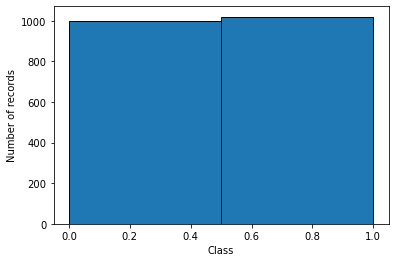

In [13]:
# Check distribution of target class
plt.hist(data["target"], bins = 2, edgecolor = "black")
plt.xlabel("Class")
plt.ylabel("Number of records")

In [14]:
#Split the data
Y = data['target']
X = data.drop('target', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify = Y)

Text(0, 0.5, 'Number of records')

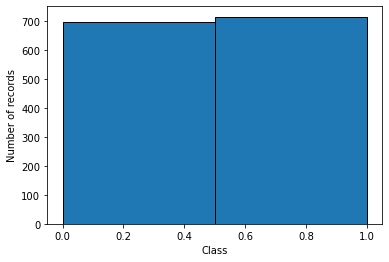

In [15]:
# Check distribution of split (Y_train)
plt.hist(Y_train, bins = 2, edgecolor = "black")
plt.xlabel("Class")
plt.ylabel("Number of records")

Text(0, 0.5, 'Number of records')

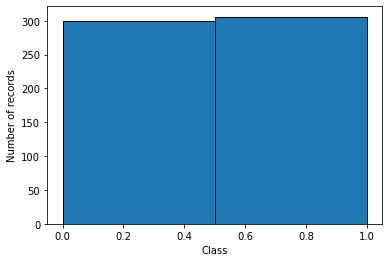

In [16]:
# Check distribution of split (Y_test)
plt.hist(Y_test, bins = 2, edgecolor = "black")
plt.xlabel("Class")
plt.ylabel("Number of records")

Looks pretty good

#### Building the Classifier

In [17]:
clf = tree.DecisionTreeClassifier()

####  Training the classifier

In [18]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

### Accuracy and Error
We will now find out the testing accuracy and error

In [19]:
Y_predictions = clf.predict(X_test)
cm = confusion_matrix(Y_predictions, Y_test)
print(cm)
Y_predictions = clf.predict(X_train)
cm_train = confusion_matrix(Y_predictions, Y_train)
print(cm_train)

[[200  97]
 [100 209]]
[[697   0]
 [  0 714]]


In [20]:
# The accuracy is all the items on the diagonal over the sum of all items
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [21]:
print("testing accuracy: ", accuracy(cm))

testing accuracy:  0.6749174917491749


In [22]:
# The error is all the items not on the diagonal over the sum of all items
def error(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return (sum_of_all_elements - diagonal_sum) / sum_of_all_elements

In [23]:
print("testing error: ", error(cm))

testing error:  0.3250825082508251


Just for convience sake now, we will also build a function that prints characteristics about the tree.

In [24]:
def get_stats(clf):
    Y_predictions = clf.predict(X_test)
    cm = confusion_matrix(Y_predictions, Y_test)
    print("testing matrix: \n" ,cm)
    print("testing accuracy: ", accuracy(cm))
    print("testing error: ", error(cm))
    Y_predictions = clf.predict(X_train)
    cm = confusion_matrix(Y_predictions, Y_train)
    print("\n training matrix: \n",cm)
    print("training accuracy: ", accuracy(cm))
    print("training error: ", error(cm))
    print("\n")
    print("Tree Depth: ", clf.get_depth())
    print("Number of Leaves: ", clf.get_n_leaves())
    plt.figure(figsize=(25,20))
    tree.plot_tree(clf, filled=True, fontsize=10, max_depth= None,feature_names = list(X.columns), class_names = True)
    plt.show()


### What if we change the depth?

In [25]:
clf.get_depth()

20

#### Let's test how the accuracy and error change between the small depth and 'clf.get_depth'
At the time of writing, the depth was 15.

In [26]:
clf_3 = tree.DecisionTreeClassifier(max_depth=3)

testing matrix: 
 [[216  87]
 [ 84 219]]
testing accuracy:  0.7178217821782178
testing error:  0.28217821782178215

 training matrix: 
 [[518 195]
 [179 519]]
training accuracy:  0.7349397590361446
training error:  0.26506024096385544


Tree Depth:  3
Number of Leaves:  8


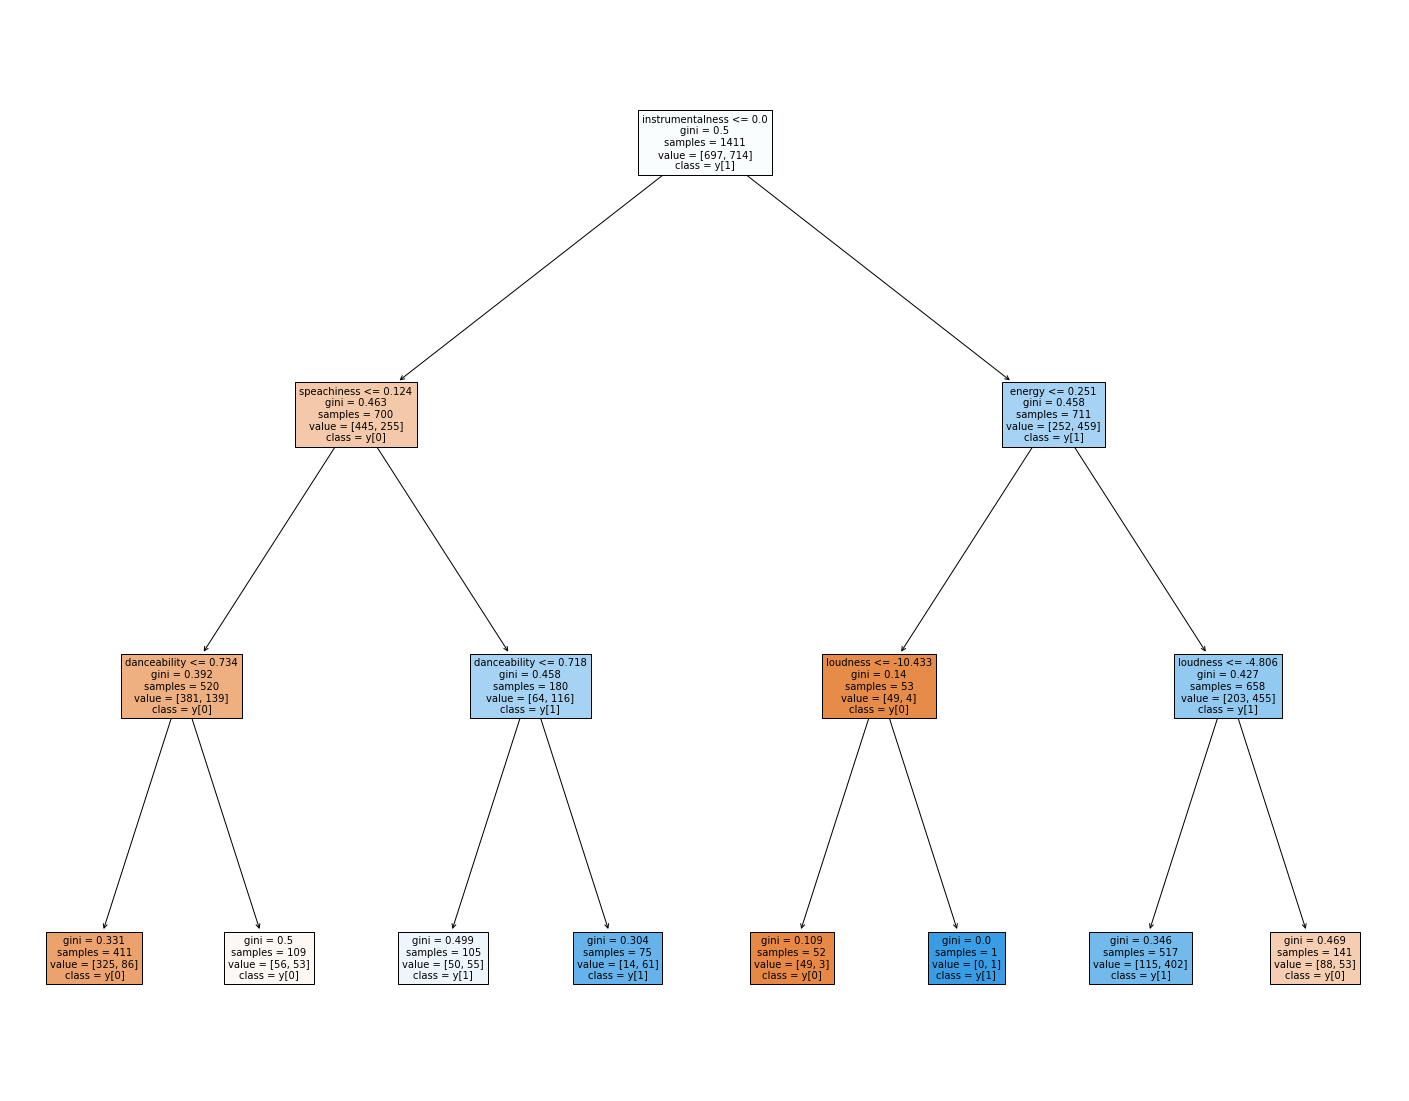

In [27]:
clf_3.fit(X_train, Y_train)
get_stats(clf = clf_3)

In [28]:
clf_6 = tree.DecisionTreeClassifier(max_depth=6)

testing matrix: 
 [[224  93]
 [ 76 213]]
testing accuracy:  0.7211221122112211
testing error:  0.27887788778877887

 training matrix: 
 [[580 127]
 [117 587]]
training accuracy:  0.8270729978738484
training error:  0.17292700212615167


Tree Depth:  6
Number of Leaves:  50


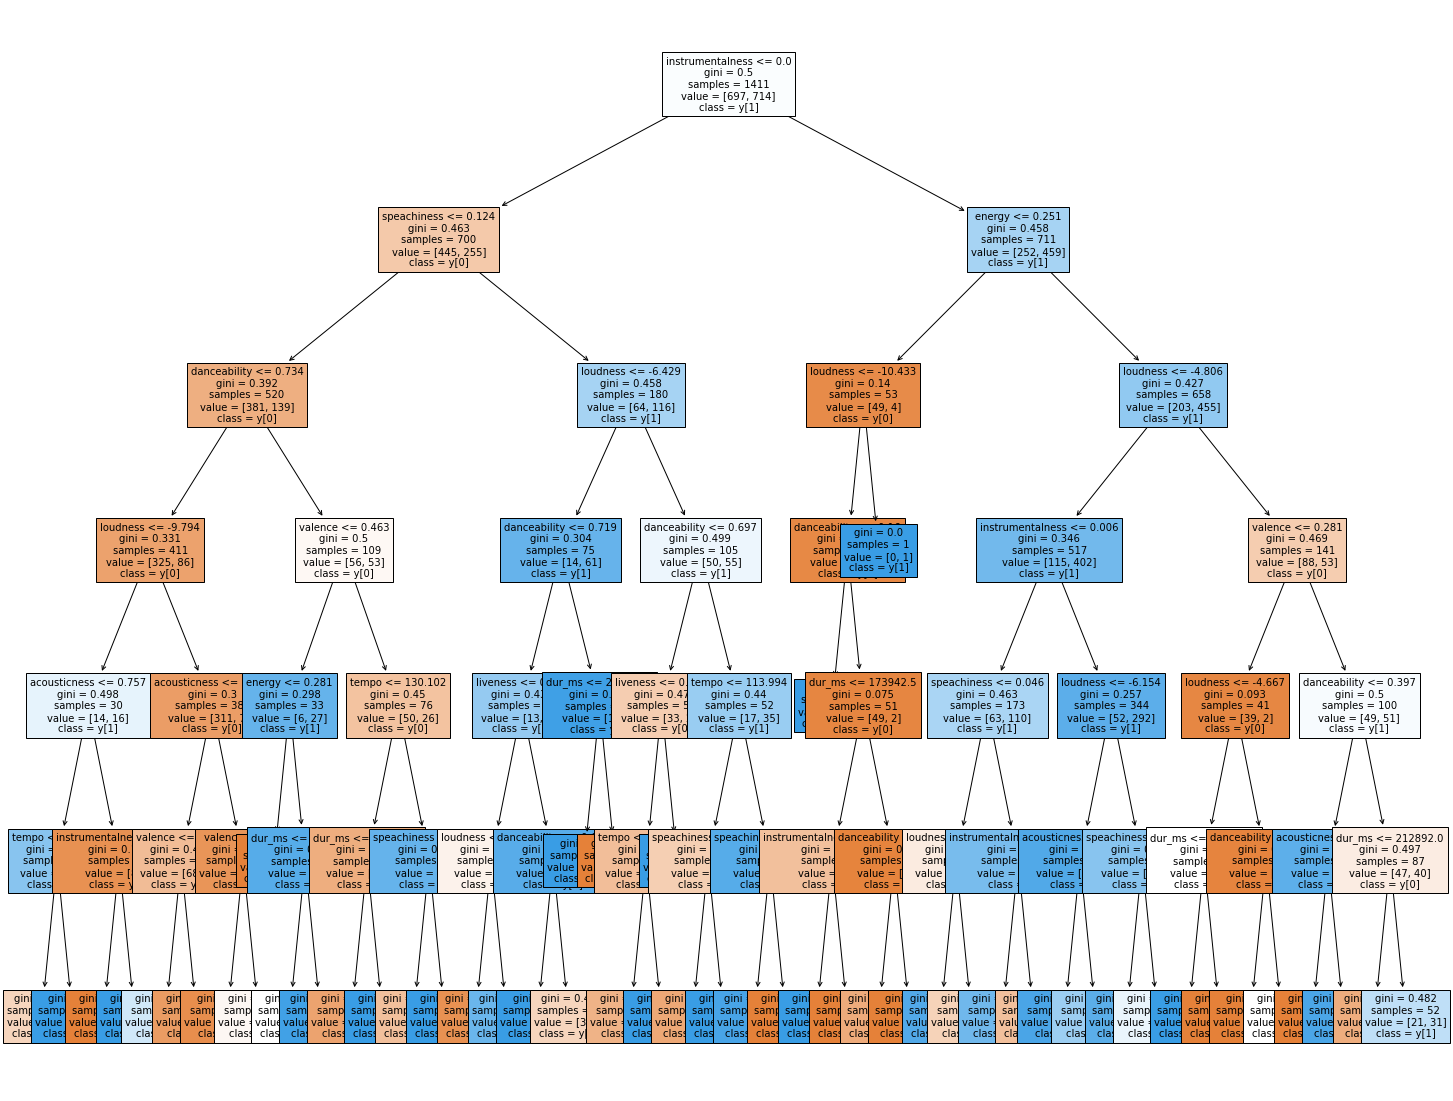

In [29]:
clf_6.fit(X_train, Y_train)
get_stats(clf=clf_6)

In [30]:
clf_9 = tree.DecisionTreeClassifier(max_depth=9)

testing matrix: 
 [[213  87]
 [ 87 219]]
testing accuracy:  0.7128712871287128
testing error:  0.2871287128712871

 training matrix: 
 [[656  44]
 [ 41 670]]
training accuracy:  0.9397590361445783
training error:  0.060240963855421686


Tree Depth:  9
Number of Leaves:  138


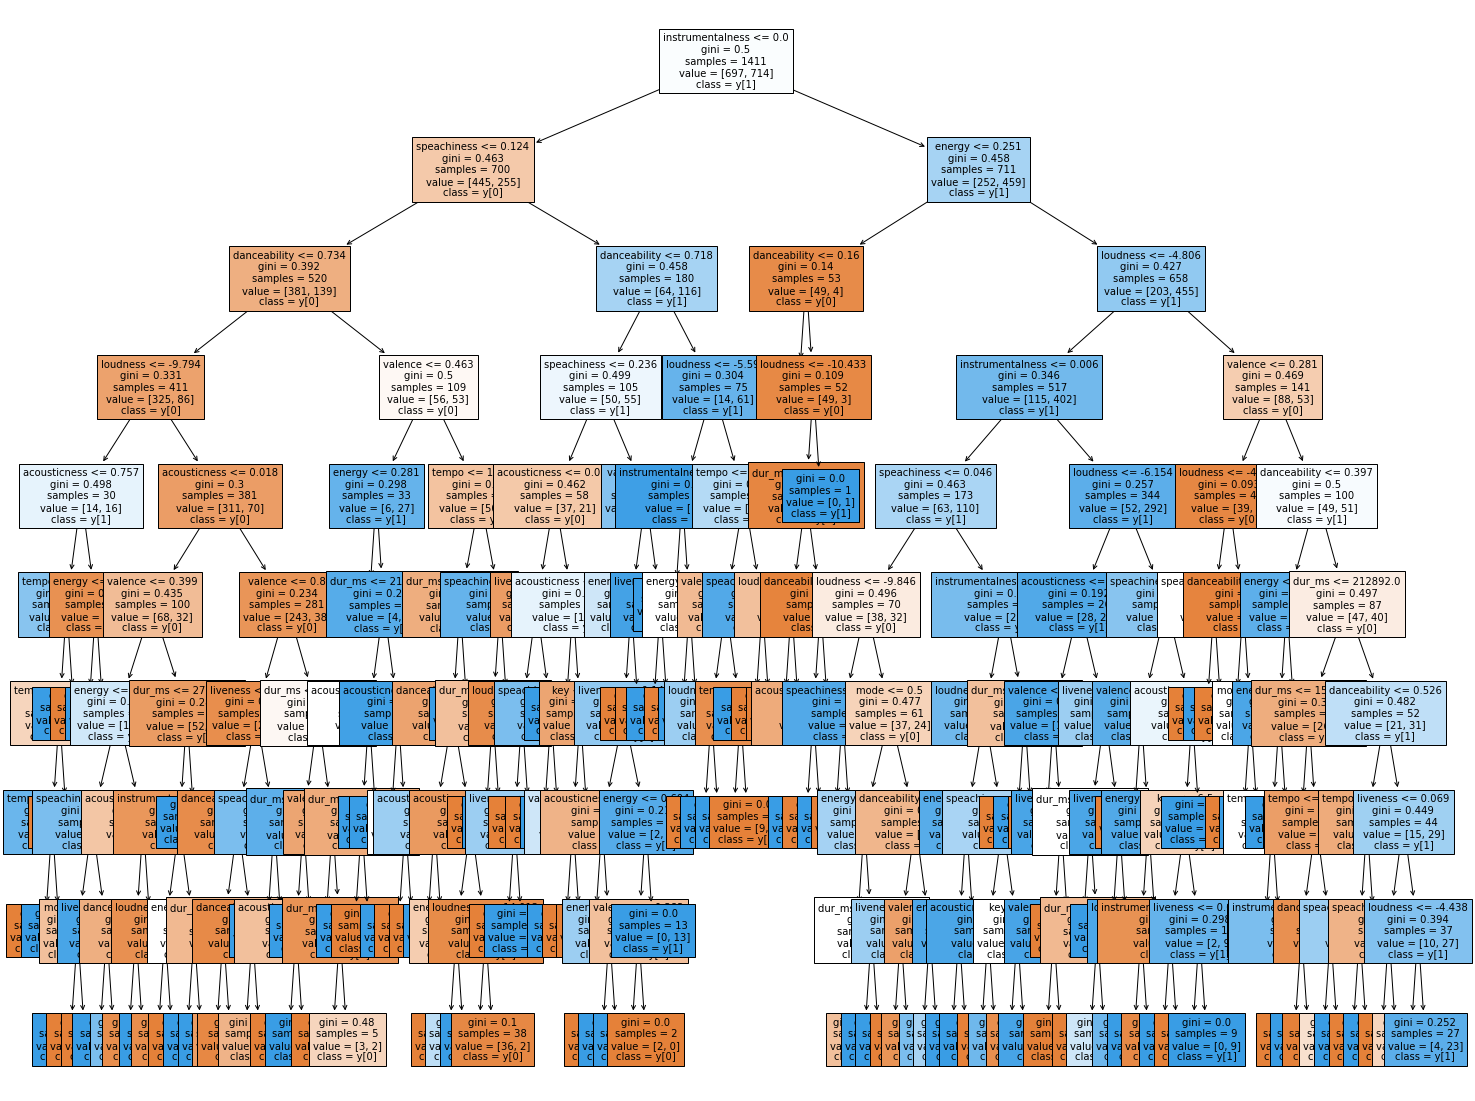

In [31]:
clf_9.fit(X_train, Y_train)
get_stats(clf=clf_9)

In [32]:
clf_12 = tree.DecisionTreeClassifier(max_depth=12)

testing matrix: 
 [[207 102]
 [ 93 204]]
testing accuracy:  0.6782178217821783
testing error:  0.3217821782178218

 training matrix: 
 [[688  12]
 [  9 702]]
training accuracy:  0.9851169383416017
training error:  0.014883061658398299


Tree Depth:  12
Number of Leaves:  197


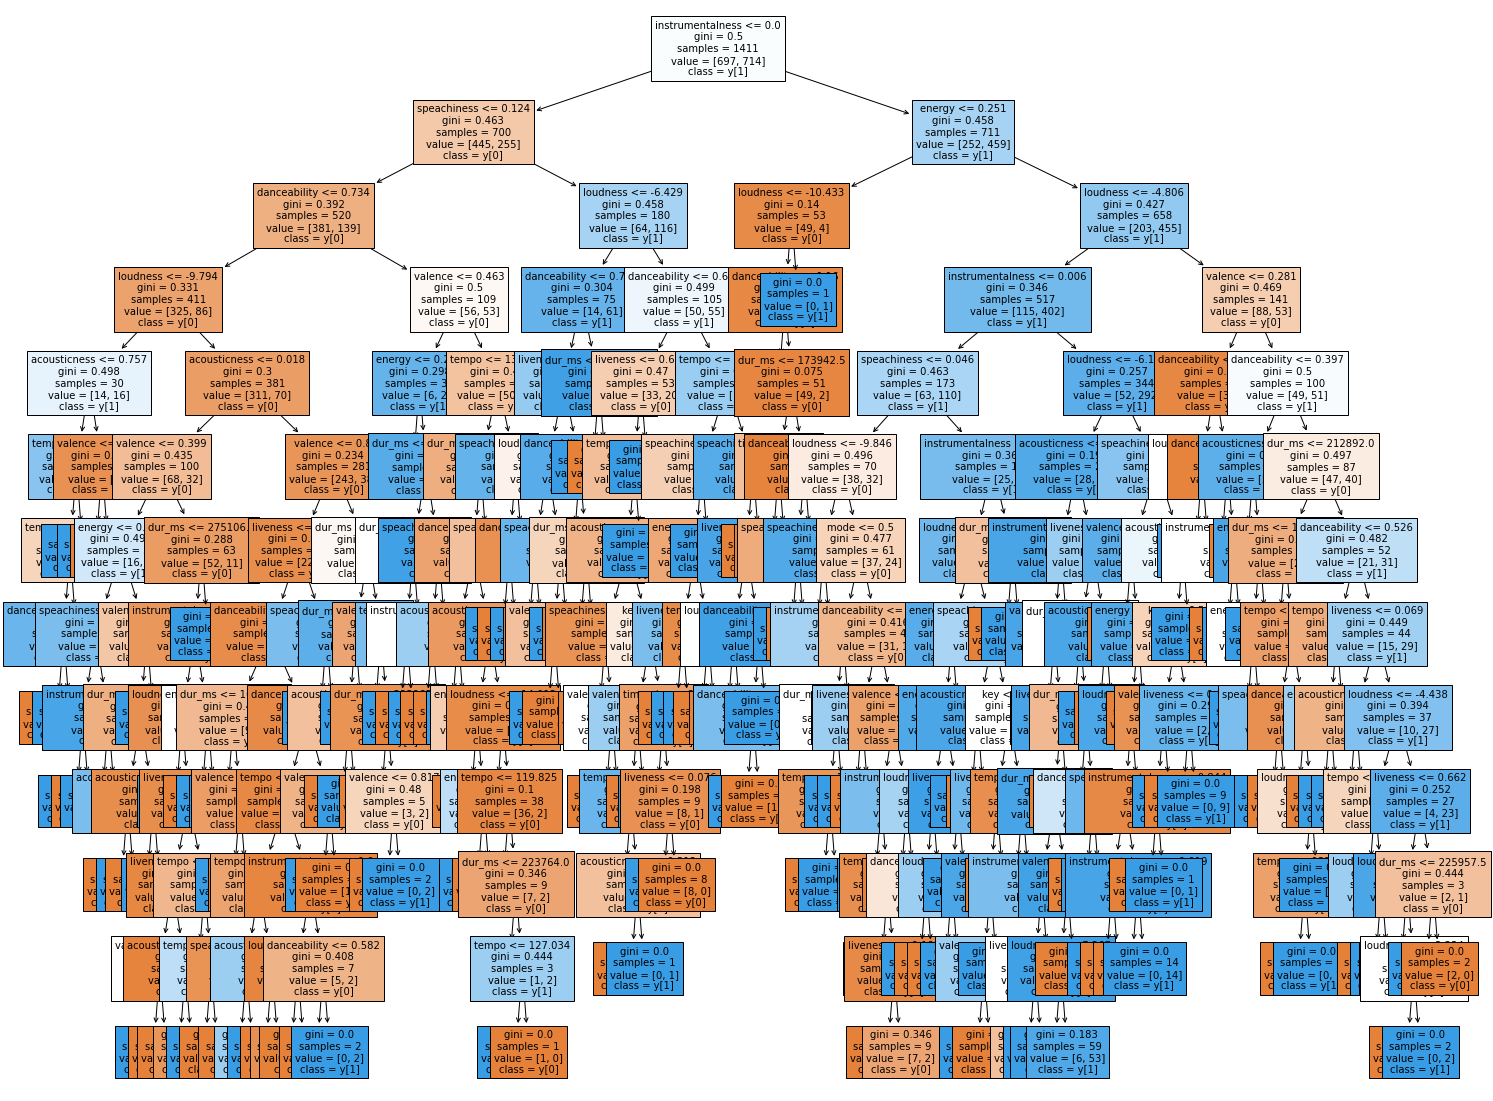

In [33]:
clf_12.fit(X_train, Y_train)
get_stats(clf=clf_12)

### Maybe there is a way to automate finding the best tree?

#### We will create a function that creates trees and returns one that has an accuracy of at least 71%

Why 71% ? 

After programing and running the above code randomly, the higher accuracy usually got to 71%. It has gone a tiny bit higher rarely, however, we don't want to create a forever loop. You are more than welcome to try different accuracies and see how long it takes to get to that accuracy, or if it ever does. If you end up with a forever loop, you can interupt the kernel and try to set the accuracy at a lower value.

When creating this function before, I thought we could find the best tree by trying to see how high we could put the accuracy input before the program goes into a forever loop. However, I realized that this function can also evaluate model underfitting and overfitting by keeping the testing accuracy the same for a range of depths, and evaluating how likely it is that a tree of a certain depth will produce that accuracy by seeing how many times the while loop has to run. The more runs that a certain type of tree has to make through the loop, the less likely it is that you will get the specified accuracy for that tree. The tree that has to make least amount of runs through the loop would be the best type of tree, because there are more instances where you get the desired accuracy compared to trees that have to make more runs. 

In [34]:
# This function creates random trees until it gets the desired accuracy and prints how many runs it took to get that tree
# This is a brute force method of finding a tree with desired accuracy
def getBestTree(acc = .71, depth = None):
    runs = 0
    while (True):
        clf = tree.DecisionTreeClassifier(splitter="random", max_depth = depth)
        clf.fit(X_train, Y_train)
        Y_predictions = clf.predict(X_test)
        cm = confusion_matrix(Y_predictions, Y_test)
        runs += 1
        if (accuracy(cm) > acc):
            print("trees built: ", runs)
            return clf


In [35]:
best_clf = getBestTree(acc=.72) #sometimes this takes a while

trees built:  4694


testing matrix: 
 [[213  82]
 [ 87 224]]
testing accuracy:  0.7211221122112211
testing error:  0.27887788778877887

 training matrix: 
 [[697   0]
 [  0 714]]
training accuracy:  1.0
training error:  0.0


Tree Depth:  30
Number of Leaves:  402


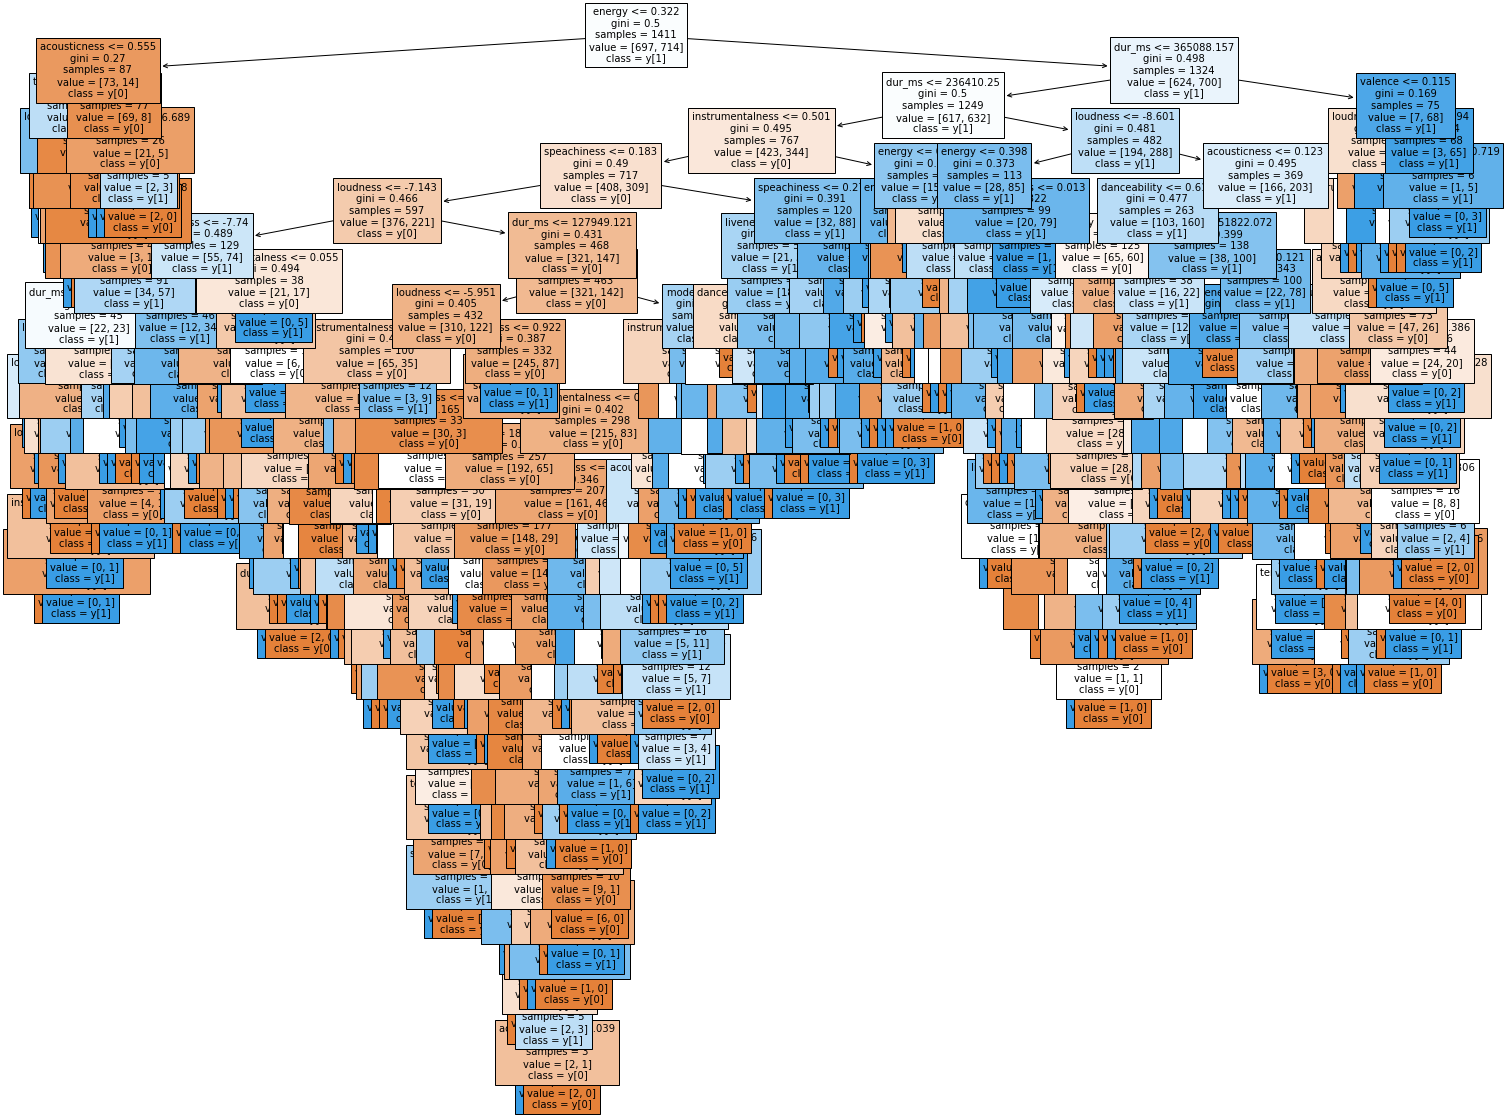

In [36]:
get_stats(clf=best_clf) #wait for the function to plot the tree

#### This tree is a bit complicated. Let's see if we can get a similar accuracy with a smaller depth and less nodes.

In [37]:
best_clf_3 = getBestTree(acc=.72, depth=3) #sometimes this takes a while

trees built:  8558


testing matrix: 
 [[214  75]
 [ 86 231]]
testing accuracy:  0.7343234323432343
testing error:  0.26567656765676567

 training matrix: 
 [[476 180]
 [221 534]]
training accuracy:  0.7158043940467753
training error:  0.2841956059532247


Tree Depth:  3
Number of Leaves:  8


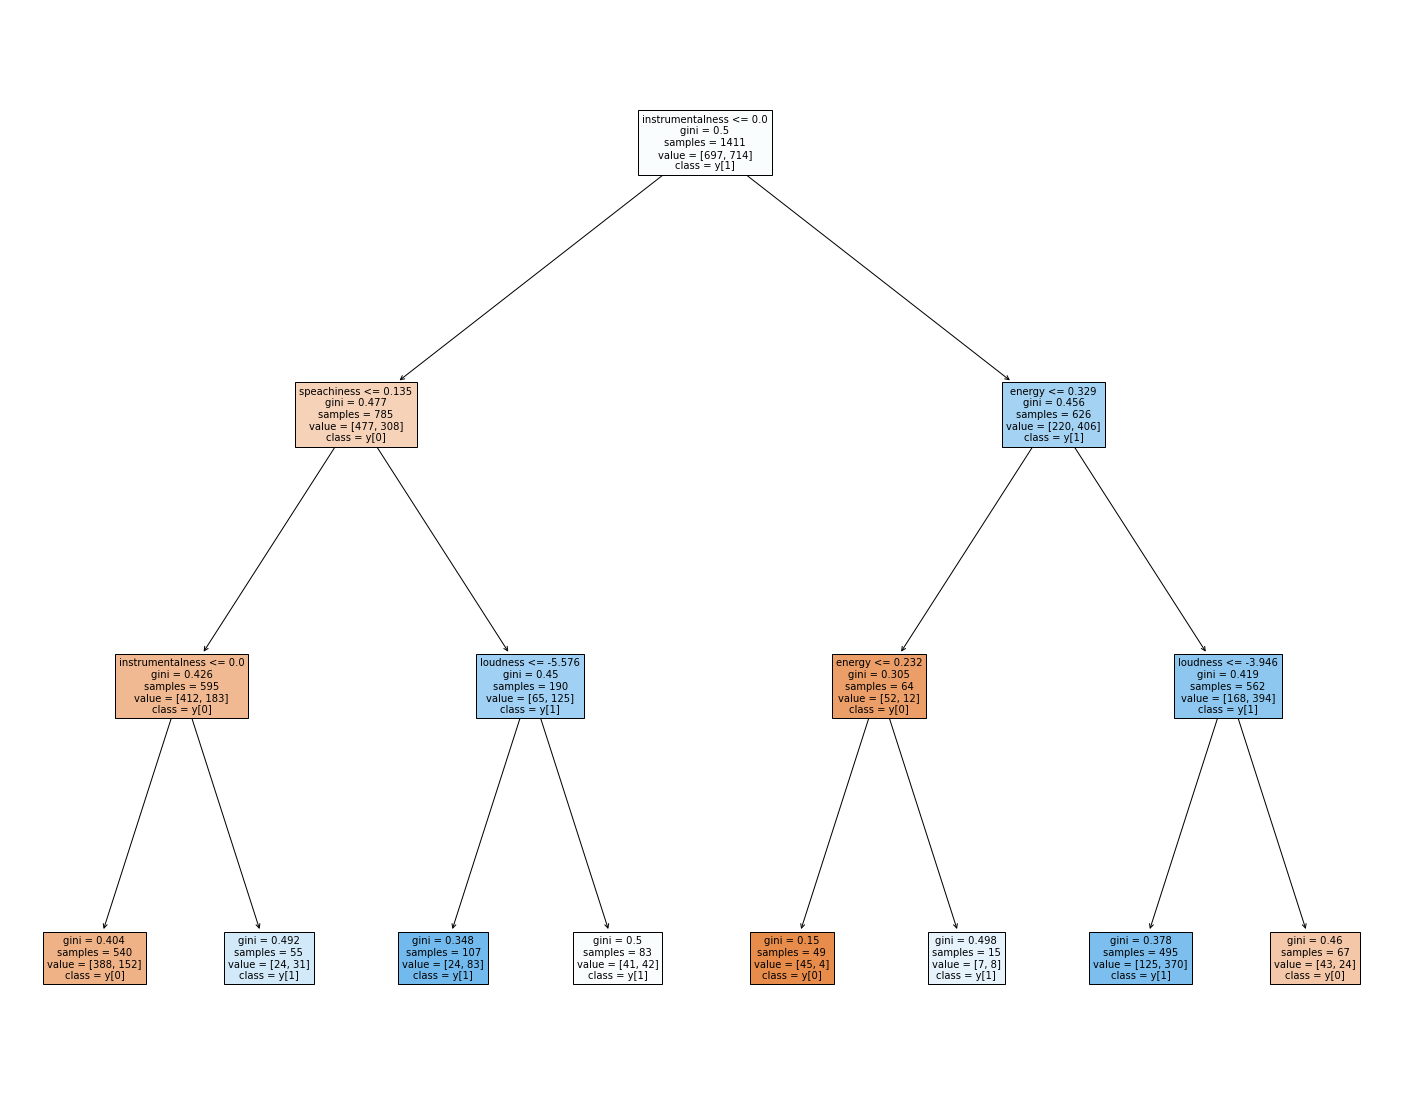

In [38]:
get_stats(clf=best_clf_3)

In [39]:
best_clf_6 = getBestTree(acc=.72, depth=6) #sometimes this takes a while

trees built:  1


testing matrix: 
 [[231  97]
 [ 69 209]]
testing accuracy:  0.7260726072607261
testing error:  0.2739273927392739

 training matrix: 
 [[554 197]
 [143 517]]
training accuracy:  0.7590361445783133
training error:  0.24096385542168675


Tree Depth:  6
Number of Leaves:  55


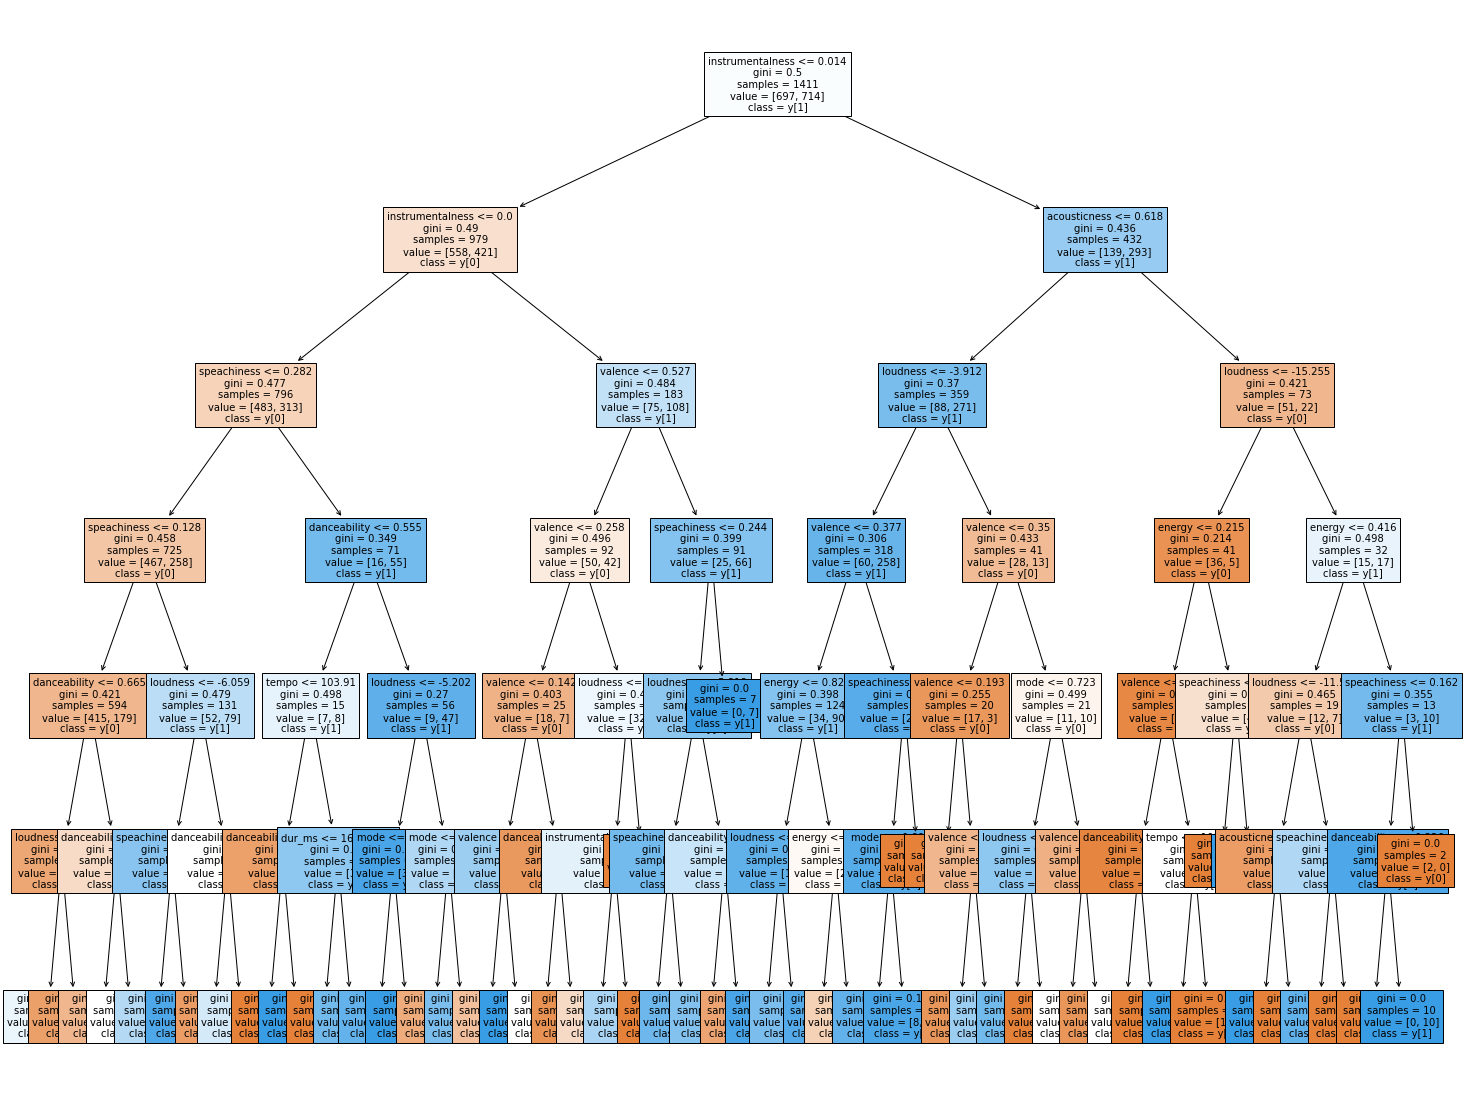

In [40]:
get_stats(clf=best_clf_6)

In [41]:
best_clf_9= getBestTree(acc=.72, depth=9) #sometimes this takes a while

trees built:  6


testing matrix: 
 [[241 103]
 [ 59 203]]
testing accuracy:  0.7326732673267327
testing error:  0.26732673267326734

 training matrix: 
 [[628 184]
 [ 69 530]]
training accuracy:  0.820694542877392
training error:  0.1793054571226081


Tree Depth:  9
Number of Leaves:  140


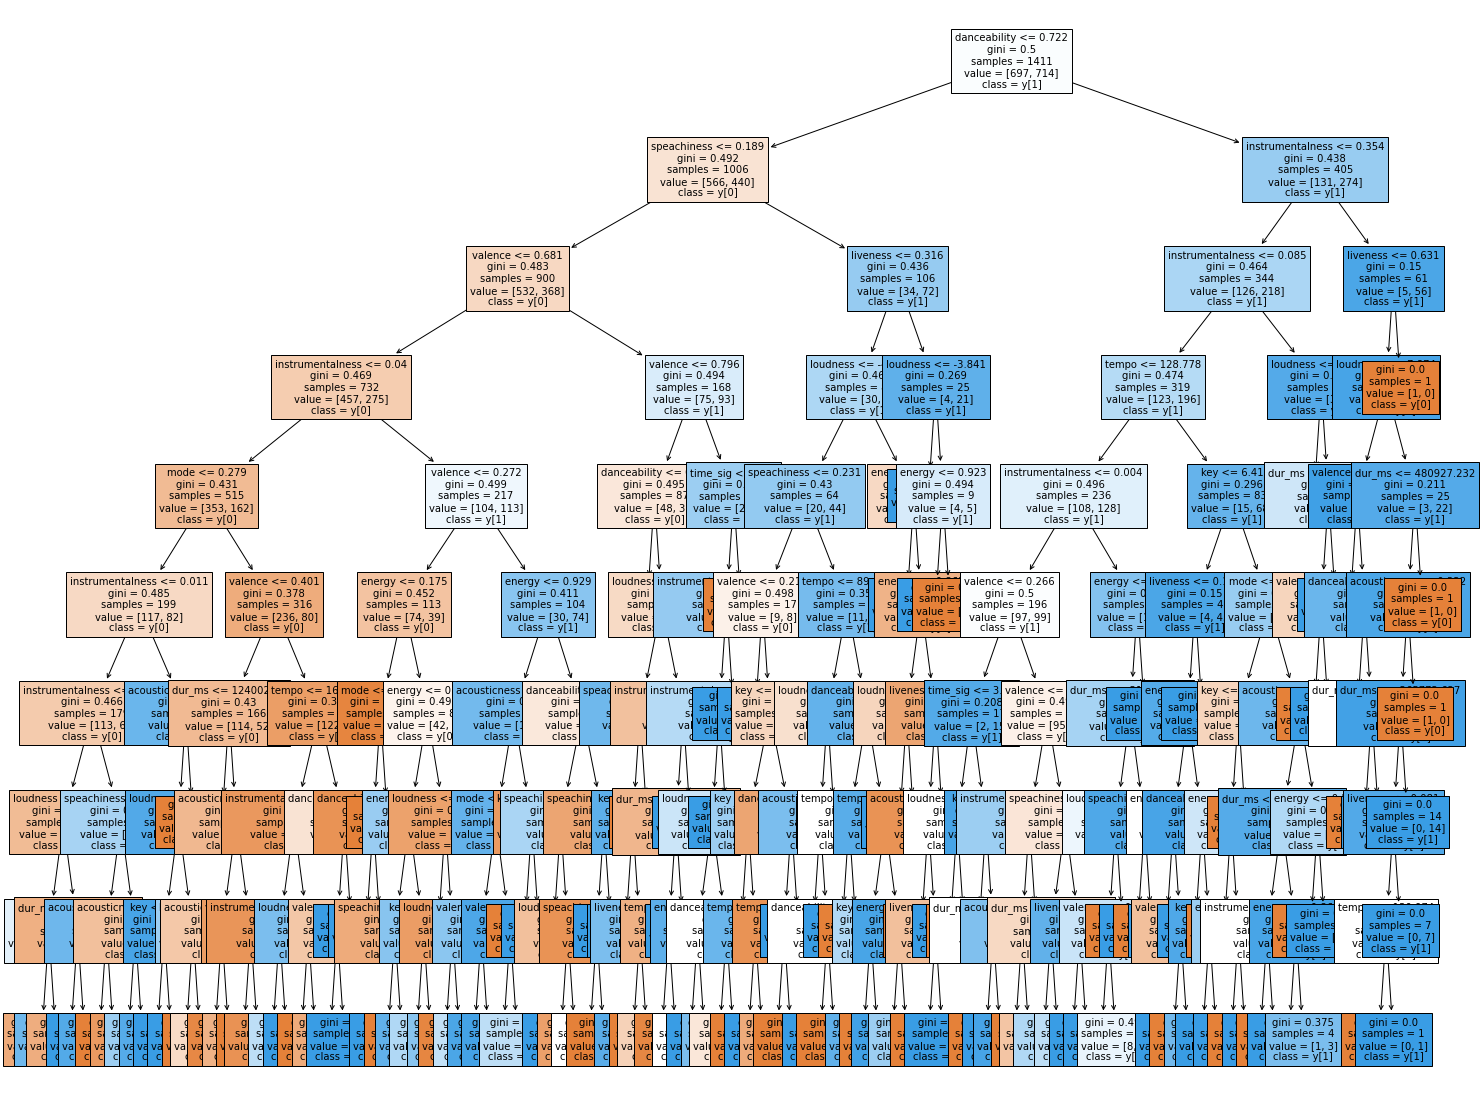

In [42]:
get_stats(best_clf_9)

In [43]:
best_clf_12 = getBestTree(acc=.72, depth = 12) #sometimes this takes a while

trees built:  1696


testing matrix: 
 [[234  95]
 [ 66 211]]
testing accuracy:  0.7343234323432343
testing error:  0.26567656765676567

 training matrix: 
 [[669 106]
 [ 28 608]]
training accuracy:  0.9050318922749823
training error:  0.09496810772501772


Tree Depth:  12
Number of Leaves:  231


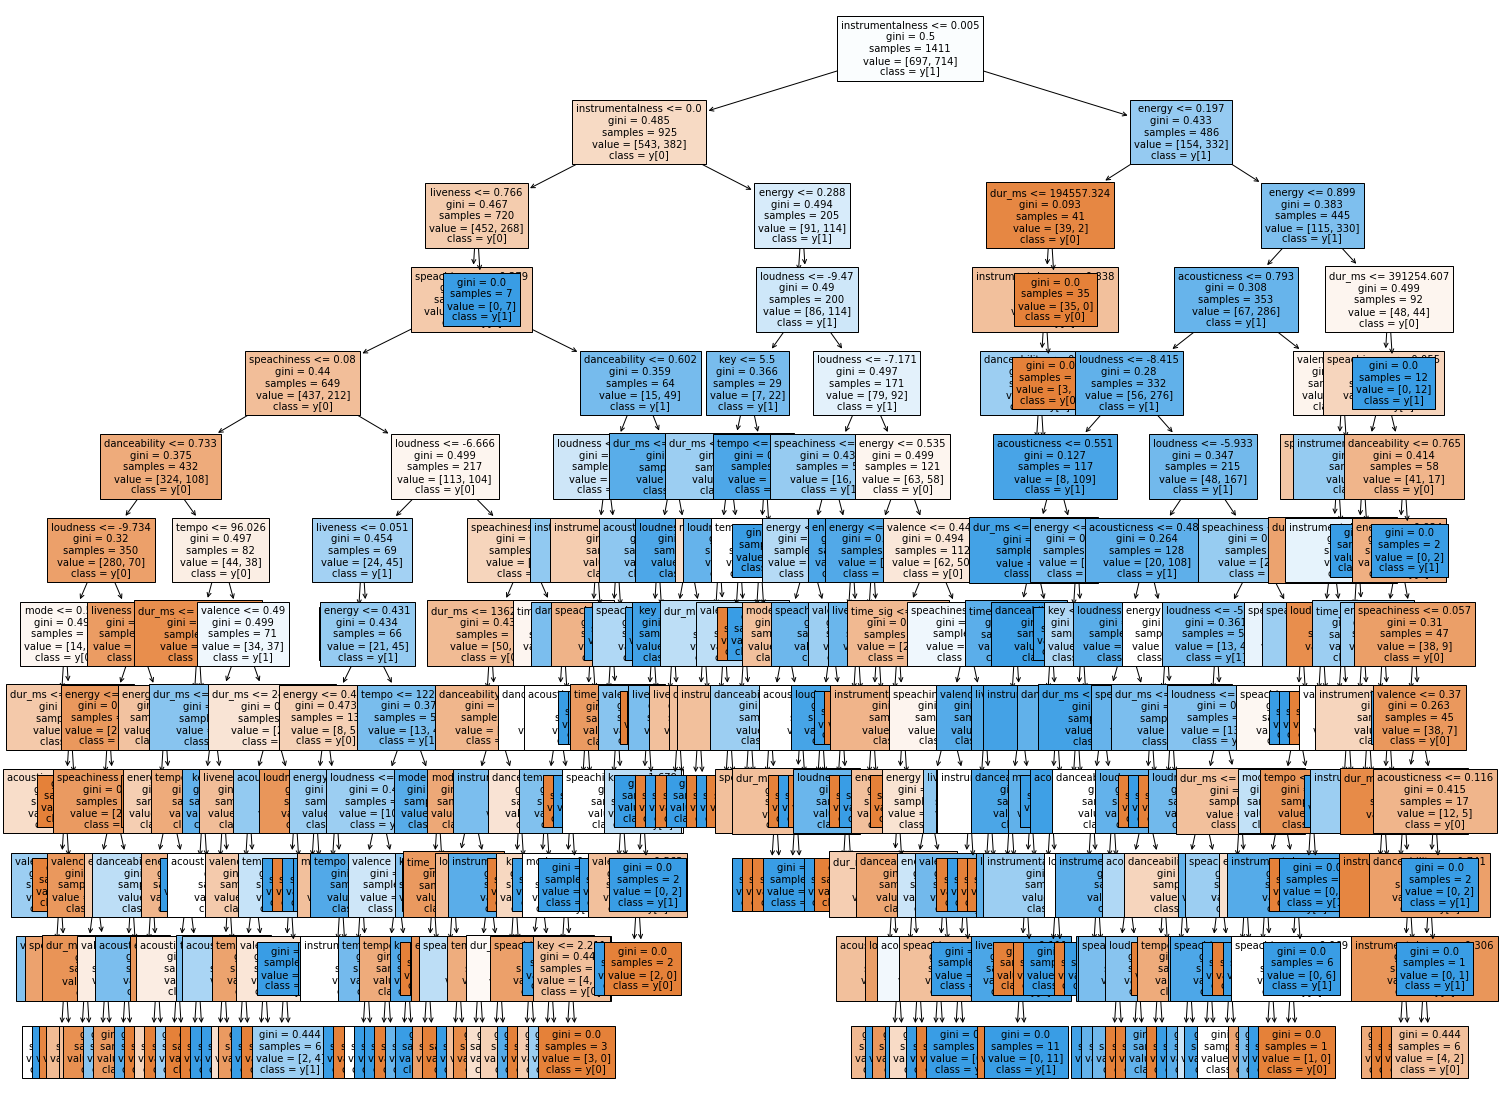

In [44]:
get_stats(best_clf_12)

In [45]:
best_clf_15 = getBestTree(acc=.72, depth = 15) #sometimes this takes a while

trees built:  574


testing matrix: 
 [[246 114]
 [ 54 192]]
testing accuracy:  0.7227722772277227
testing error:  0.27722772277227725

 training matrix: 
 [[686 112]
 [ 11 602]]
training accuracy:  0.9128277817150957
training error:  0.08717221828490432


Tree Depth:  15
Number of Leaves:  259


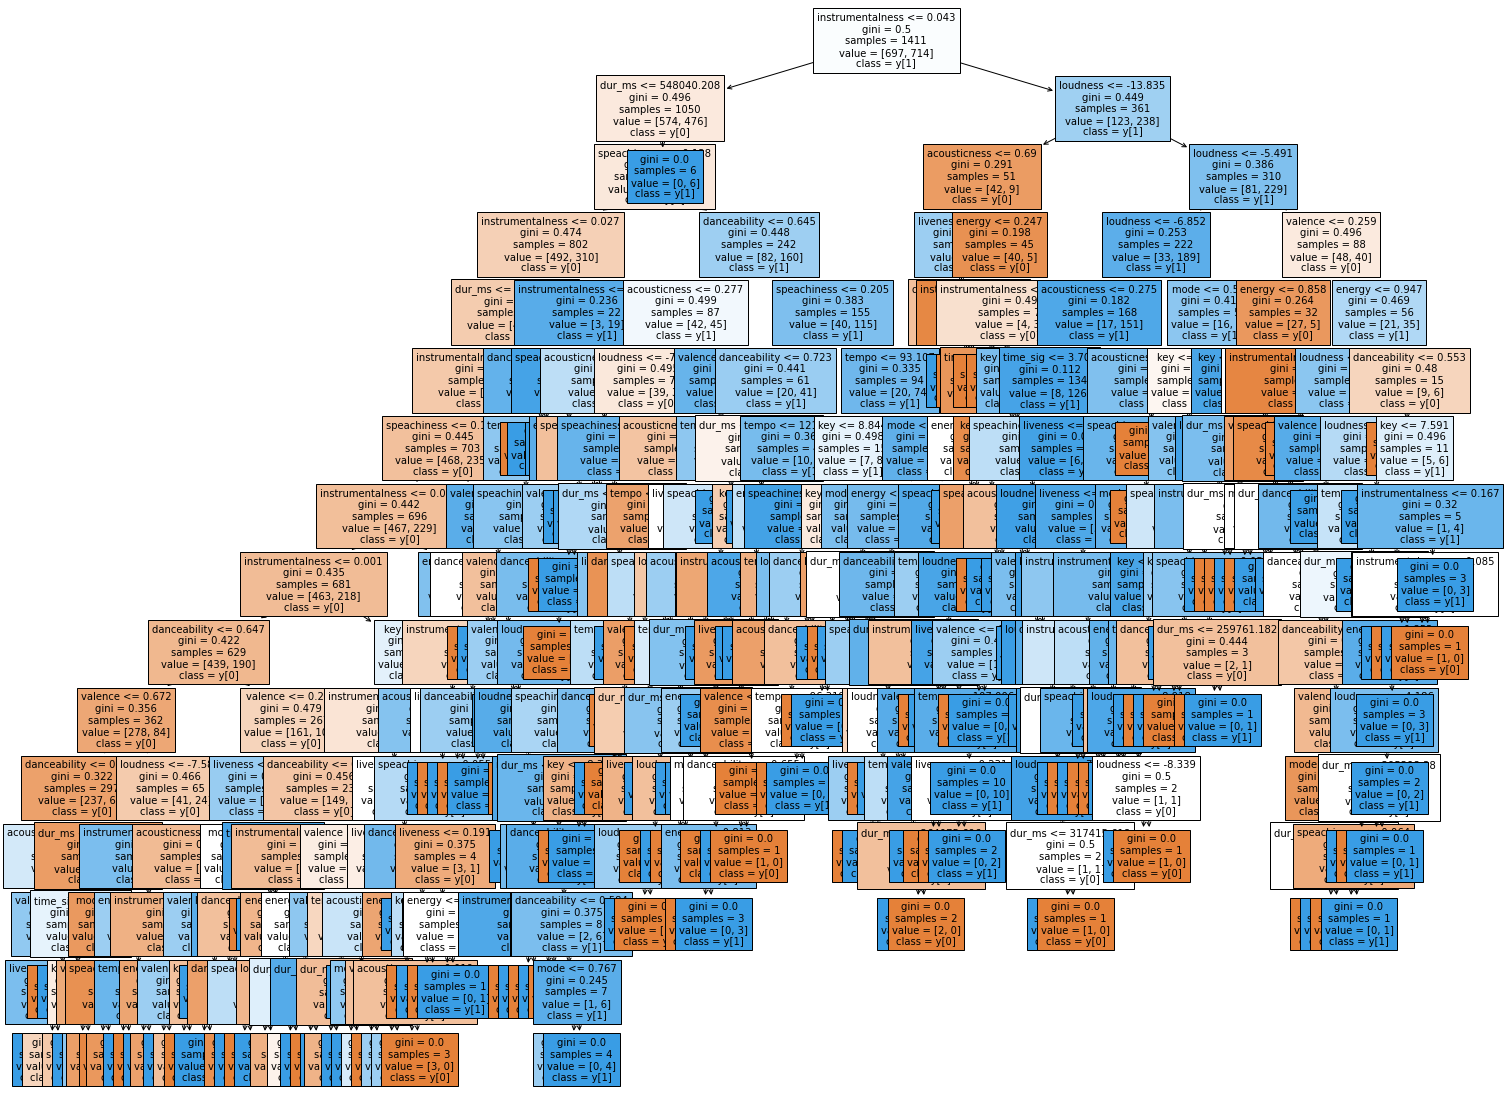

In [46]:
get_stats(best_clf_15)

### Observations

It seems like the best trees are created when the max depth is 6 or 9. The trend seems to be that the model is underfitted near at around a depth of 3, then has a good fit around 6 or 9, then is overfitted at around a depth of 12 and above. 

### Building the SVM

In [47]:
# Scale the data
scaler = sk_preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
svc = SVC()
svc.fit(X_train, Y_train.values.ravel())

SVC()

In [49]:
# Test the model
y_pred = svc.predict(X_test)

In [50]:
print(confusion_matrix(Y_test, y_pred))

[[225  75]
 [ 95 211]]


#### Let's create a function similar to get_stats but for SVM

In [51]:
def get_stats(clf):
    Y_predictions = clf.predict(X_test)
    cm = confusion_matrix(Y_predictions, Y_test)
    print("testing matrix: \n" ,cm)
    print("testing accuracy: ", accuracy(cm))
    print("testing error: ", error(cm))
    Y_predictions = clf.predict(X_train)
    cm = confusion_matrix(Y_predictions, Y_train)
    print("\n training matrix: \n",cm)
    print("training accuracy: ", accuracy(cm))
    print("training error: ", error(cm))
    print("\n")

In [52]:
get_stats(svc)

testing matrix: 
 [[225  95]
 [ 75 211]]
testing accuracy:  0.7194719471947195
testing error:  0.28052805280528054

 training matrix: 
 [[605 164]
 [ 92 550]]
training accuracy:  0.8185683912119065
training error:  0.18143160878809356


